In [85]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [86]:
df = pd.read_csv("mascotas.csv")


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [88]:
df.nunique()

Type                 2
Name              9059
Age                106
Breed1             176
Breed2             135
Gender               3
Color1               7
Color2               7
Color3               6
MaturitySize         4
FurLength            3
Vaccinated           3
Dewormed             3
Sterilized           3
Health               3
Quantity            19
Fee                 74
State               14
RescuerID         5595
VideoAmt             9
Description      14031
PetID            14993
PhotoAmt            31
AdoptionSpeed        5
dtype: int64

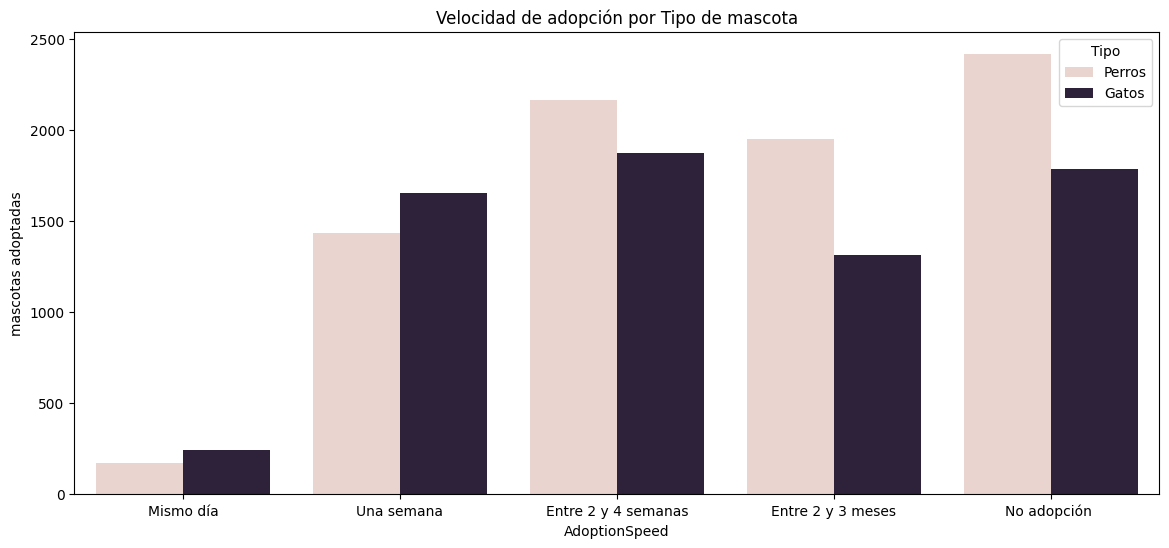

In [89]:


plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=df, hue='Type')
plt.title('Velocidad de adopción por Tipo de mascota')

# Agrega etiqueta en el eje y
plt.ylabel('mascotas adoptadas')

# Agrega etiquetas para las categorías del eje x
plt.xticks([0, 1, 2, 3, 4], ['Mismo día', 'Una semana', 'Entre 2 y 4 semanas', 'Entre 2 y 3 meses', 'No adopción '])

# Agrega etiquetas para las categorías del eje hue
hue_labels = ['Perros', 'Gatos']  # Reemplaza con las etiquetas reales
g.legend(title='Tipo', labels=hue_labels)

plt.show()




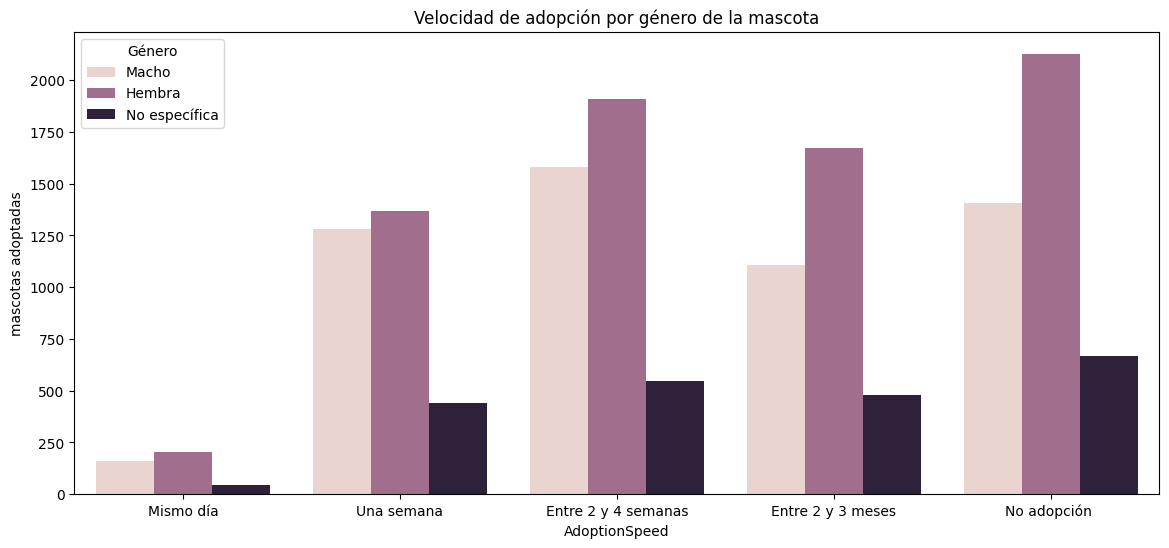

In [90]:


plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=df, hue='Gender')
plt.title("Velocidad de adopción por género de la mascota")

# Agrega etiqueta en el eje y
plt.ylabel('mascotas adoptadas')

# Agrega etiquetas para las categorías del eje x
plt.xticks([0, 1, 2, 3, 4], ['Mismo día', 'Una semana', 'Entre 2 y 4 semanas', 'Entre 2 y 3 meses', 'No adopción '])

# Agrega etiquetas para las categorías del eje hue
hue_labels = ['Macho', 'Hembra',"No específica"]  # Reemplaza con las etiquetas reales
g.legend(title='Género', labels=hue_labels)

plt.show()


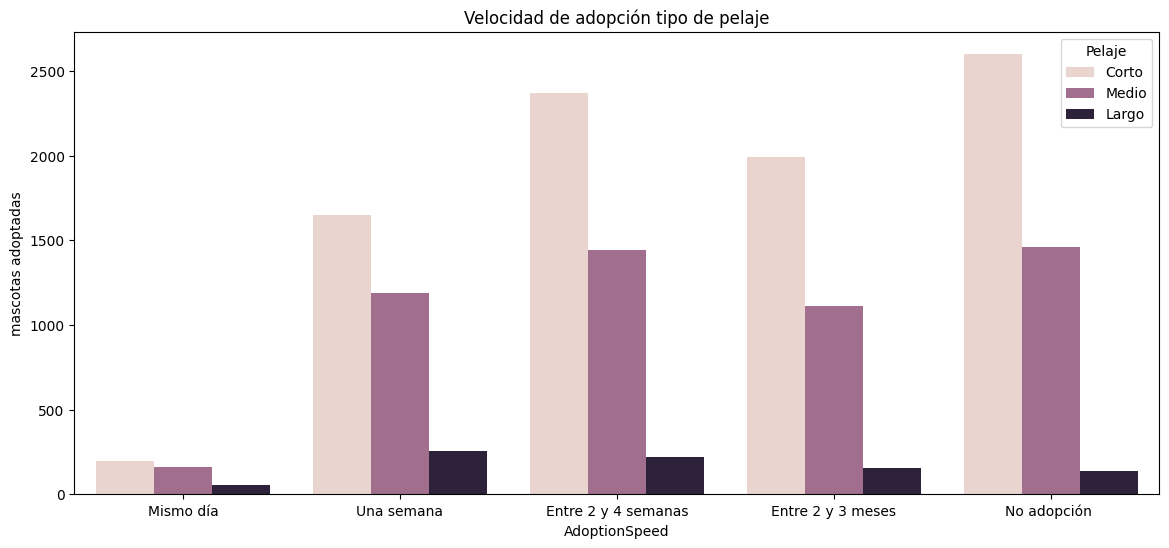

In [91]:


plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=df, hue='FurLength')
plt.title("Velocidad de adopción tipo de pelaje")

# Agrega etiqueta en el eje y
plt.ylabel('mascotas adoptadas')

# Agrega etiquetas para las categorías del eje x
plt.xticks([0, 1, 2, 3, 4], ['Mismo día', 'Una semana', 'Entre 2 y 4 semanas', 'Entre 2 y 3 meses', 'No adopción '])

# Agrega etiquetas para las categorías del eje hue
hue_labels = ['Corto', 'Medio',"Largo"]  # Reemplaza con las etiquetas reales
g.legend(title='Pelaje', labels=hue_labels)

plt.show()

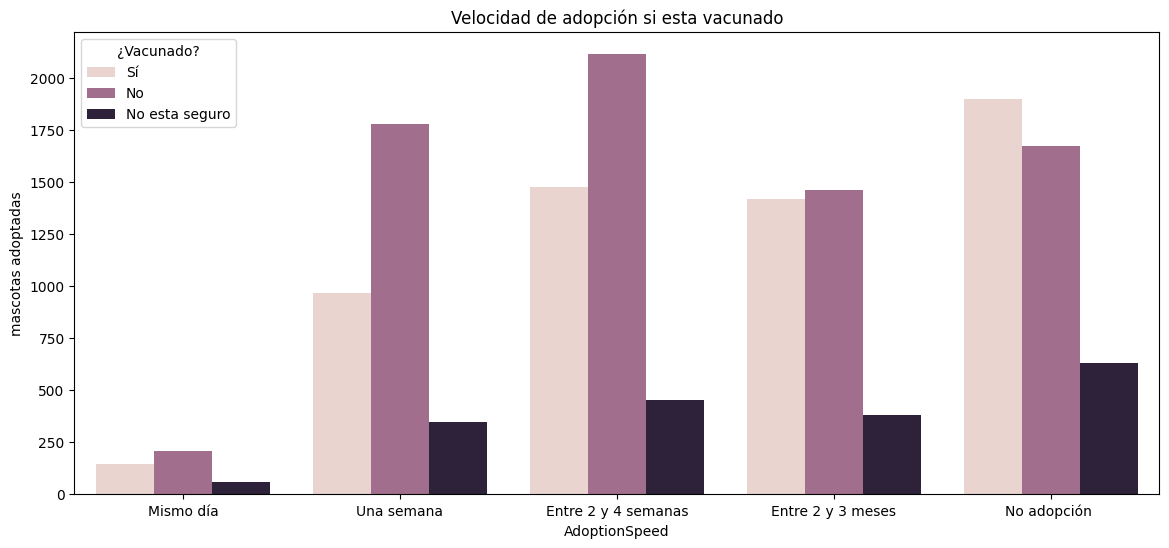

In [92]:

plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=df, hue='Vaccinated')
plt.title("Velocidad de adopción si esta vacunado")

# Agrega etiqueta en el eje y
plt.ylabel('mascotas adoptadas')

# Agrega etiquetas para las categorías del eje x
plt.xticks([0, 1, 2, 3, 4], ['Mismo día', 'Una semana', 'Entre 2 y 4 semanas', 'Entre 2 y 3 meses', 'No adopción '])

# Agrega etiquetas para las categorías del eje hue
hue_labels = ['Sí', 'No',"No esta seguro"]  # Reemplaza con las etiquetas reales
g.legend(title='¿Vacunado?', labels=hue_labels)

plt.show()

                                Limpiamos los datos

En este caso elminaremos datos que no aporten mucho a nuestra predicción, despues veremos la correlacion que hay entre las caracteristicas de cada mascota


In [93]:
df = df.drop(columns=["Name","RescuerID","PetID","Description"])
df = df.drop(columns=["VideoAmt","PhotoAmt","State","Quantity"])

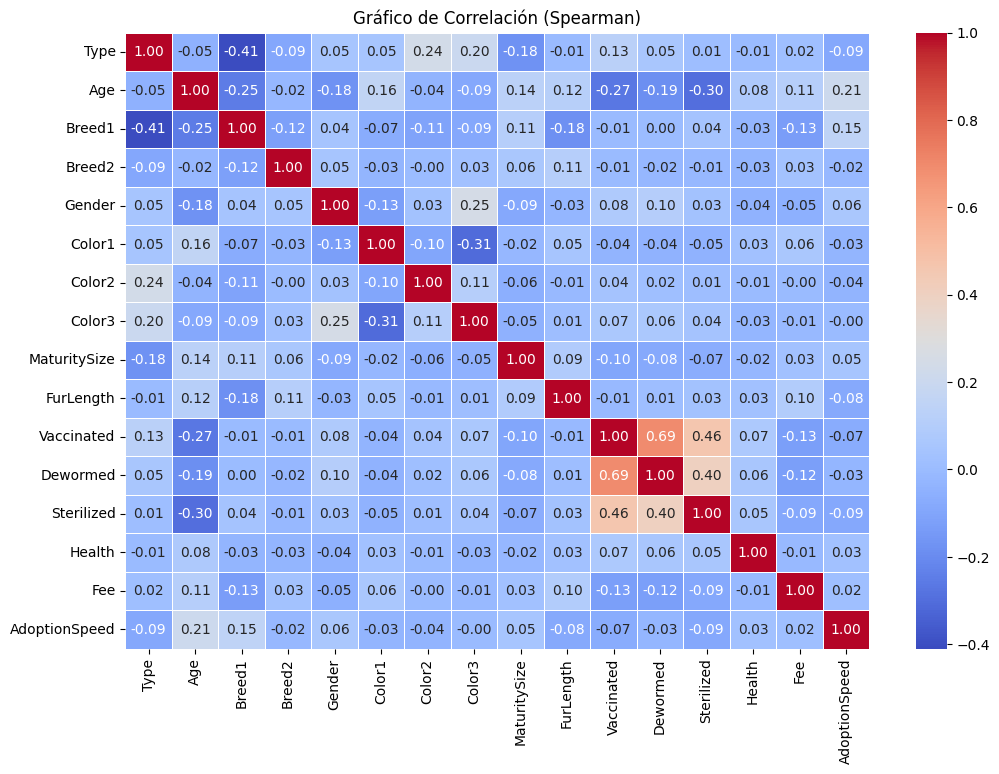

In [94]:
correlation_matrix = df.corr(method='spearman')

# Crea un gráfico de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación (Spearman)")
plt.show()


                                     KNN       

In [95]:
x_1 = df.drop(["AdoptionSpeed"],axis = 1)
y_1 = df.AdoptionSpeed


In [96]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.40, random_state=SEED)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))


Son 8995 datos para entrenamiento y 5998 datos para prueba


In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

In [100]:
acc =  classifier.score(X_test, y_test)
print(acc) 

0.29826608869623206


              precision    recall  f1-score   support

           0       0.05      0.07      0.06       191
           1       0.26      0.42      0.32      1246
           2       0.29      0.32      0.31      1562
           3       0.30      0.20      0.24      1297
           4       0.45      0.29      0.35      1702

    accuracy                           0.30      5998
   macro avg       0.27      0.26      0.25      5998
weighted avg       0.32      0.30      0.30      5998



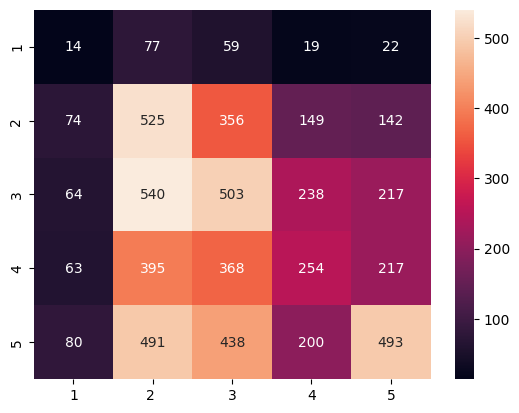

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

# Adding classes names for better interpretation
classes_names = ['1','2 ','3',"4","5"]
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

In [102]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 3 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

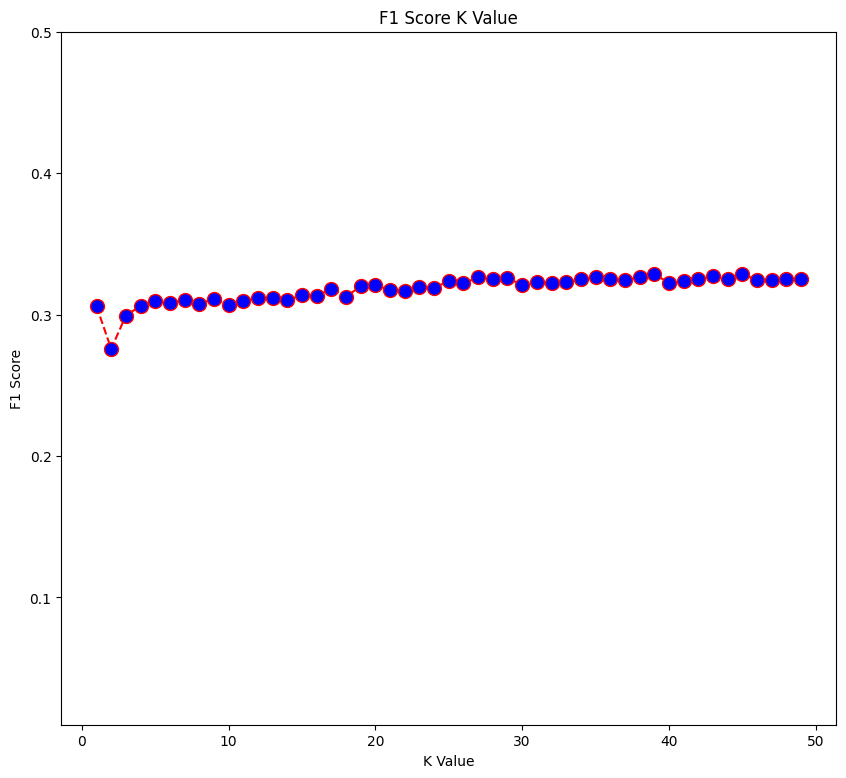

In [103]:
plt.figure(figsize=(10, 9))
plt.plot(range(1, 50), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.ylim(0.01, 0.5)
plt.show()

In [104]:
classifier15 = KNeighborsClassifier(n_neighbors=20)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.28      0.29      0.28      1246
           2       0.28      0.39      0.33      1562
           3       0.29      0.21      0.24      1297
           4       0.45      0.43      0.44      1702

    accuracy                           0.33      5998
   macro avg       0.26      0.26      0.26      5998
weighted avg       0.32      0.33      0.32      5998



C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

### EJEMPLO


* Tipo: Perro(1) gato(2)
* Edad en meses
* Primera raza (consultar la tabla "BreedLabels.csv")
* Segunda raza raza (Si la mascota es de varias razas)
* genero (1=macho, 2=hembra, 3=mezclado, en caso de ser mas de una mascota)
* Color1 (consultar "ColorLabels.csv")
* Color2 (consultar "ColorLabels.csv")
* Color3 (consultar "ColorLabels.csv")
* tamaño: (1 = pequeño, 2 = Mediano, 3 = Largo, 4 = Extra largo, 0 = No especificado)
* Largo del pelaje: (1 = corto, 2 = mediano, 3 = Largo, 0 = No especificado)
* vacunado: (1 = si, 2 = No, 3 = No especificado)
* Desparasitado(1 = si, 2 = No, 3 = No especificado)
* Esterilizado(1 = si, 2 = No, 3 = No espcificado)
* salud:  (1 = sano, 2 = leve herida, 3 = herida grave, 0 = No especificado)
* Tarifa (0= adopción gratis)


## Un gato macho de 6 meses, de raza siberian, de color gris blanco y blanco, mediano, de pelaje largo, tiene vacunas y desperasitante pero no ha sido esterilizado, saludable y con adopcion gratuita

In [105]:
caraterísticas_mascota=[2,6,293,293,1,6,7,7,2,3,1,1,2,1,0]
prediccion = classifier15.predict([caraterísticas_mascota])
print("La mascota será adopatada en la categoría:", prediccion[0])

La mascota será adopatada en la categoría: 4


                              CATEGORIAS

0: la mascota fue adoptada el mismo día en que figuraba en la lista.

1 - La mascota fue adoptada entre 1 y 7 días (1.ª semana) después de haber sido incluida en la lista.

2 - La mascota fue adoptada entre 8 y 30 días (1er mes) después de haber sido incluida en la lista.

3 - La mascota fue adoptada entre 31 y 90 días (segundo y tercer mes) después de haber sido incluida en la lista.

4 - No adopción después de 100 días de estar incluido en la lista. (No hay mascotas en este conjunto de datos que hayan esperado entre 90 y 100 días)